In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
import opendatasets as od

In [3]:
# od.download('https://www.kaggle.com/competitions/playground-series-s4e5/data')

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,1117952,3,3,4,10,4,5,5,7,10,4,3,7,8,7,2,2,1,4,6,4,0.495
1117953,1117953,2,2,4,3,9,5,8,1,3,5,5,9,4,4,3,7,4,9,4,5,0.480
1117954,1117954,7,3,9,4,6,5,9,1,3,4,5,5,5,5,5,6,5,5,2,4,0.485
1117955,1117955,7,3,3,7,5,2,3,4,6,4,6,6,8,5,3,4,6,7,6,4,0.495


In [6]:
df = df.drop(['id'],axis= 1)

In [7]:
df

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3,0.445
1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3,0.450
2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3,0.530
3,3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5,0.535
4,5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,3,3,4,10,4,5,5,7,10,4,3,7,8,7,2,2,1,4,6,4,0.495
1117953,2,2,4,3,9,5,8,1,3,5,5,9,4,4,3,7,4,9,4,5,0.480
1117954,7,3,9,4,6,5,9,1,3,4,5,5,5,5,5,6,5,5,2,4,0.485
1117955,7,3,3,7,5,2,3,4,6,4,6,6,8,5,3,4,6,7,6,4,0.495


In [8]:
input_cols = list(df.columns[:-1])
target_cols = 'FloodProbability'

In [9]:
main_inputs , main_targets = df[input_cols].copy() , df[target_cols].copy()

In [10]:
imputer = SimpleImputer(strategy='mean').fit(main_inputs[input_cols])
main_inputs[input_cols] = imputer.transform(main_inputs[input_cols])

In [11]:
scaler = MinMaxScaler().fit(df[input_cols])
main_inputs[input_cols] = scaler.transform(main_inputs[input_cols])

In [12]:
train_df , val_df = train_test_split(main_inputs, test_size=0.2 , random_state=42)
train_targets , val_targets = train_test_split(main_targets , test_size=0.2 , random_state= 42)

In [13]:
train_df.sort_index(axis=1, inplace=True)
val_df.sort_index(axis=1,inplace=True)

In [14]:
train_targets

805665     0.575
863045     0.400
496045     0.505
1079364    0.455
191800     0.535
           ...  
110268     0.450
259178     0.545
131932     0.420
671155     0.485
121958     0.505
Name: FloodProbability, Length: 894365, dtype: float64

In [15]:
train_df

,AgriculturalPractices,ClimateChange,CoastalVulnerability,DamsQuality,Deforestation,DeterioratingInfrastructure,DrainageSystems,Encroachments,InadequatePlanning,IneffectiveDisasterPreparedness,Landslides,MonsoonIntensity,PoliticalFactors,PopulationScore,RiverManagement,Siltation,TopographyDrainage,Urbanization,Watersheds,WetlandLoss
805665,0.1875,0.176471,0.352941,0.8125,0.352941,0.294118,0.352941,0.111111,0.2500,0.3125,0.3750,0.5000,0.4375,0.111111,0.4375,0.5000,0.388889,0.235294,0.3125,0.315789
863045,0.3750,0.294118,0.294118,0.4375,0.117647,0.117647,0.352941,0.111111,0.1875,0.1250,0.0000,0.4375,0.2500,0.277778,0.2500,0.1875,0.222222,0.235294,0.3750,0.210526
496045,0.3750,0.411765,0.411765,0.1875,0.352941,0.235294,0.294118,0.222222,0.3125,0.2500,0.3750,0.3750,0.1875,0.500000,0.0625,0.3125,0.277778,0.352941,0.3125,0.157895
1079364,0.2500,0.176471,0.352941,0.0625,0.176471,0.235294,0.529412,0.333333,0.2500,0.4375,0.1250,0.2500,0.0625,0.388889,0.3750,0.3125,0.333333,0.176471,0.3125,0.368421
191800,0.4375,0.235294,0.117647,0.3750,0.117647,0.294118,0.294118,0.333333,0.2500,0.1875,0.3750,0.3750,0.6250,0.277778,0.5000,0.3750,0.166667,0.411765,0.3750,0.210526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,0.2500,0.294118,0.411765,0.1875,0.235294,0.352941,0.117647,0.055556,0.3125,0.3125,0.1875,0.2500,0.3125,0.111111,0.3125,0.5000,0.388889,0.235294,0.4375,0.210526
259178,0.1250,0.411765,0.176471,0.3750,0.294118,0.411765,0.411765,0.444444,0.1875,0.1875,0.4375,0.1875,0.5000,0.166667,0.3750,0.5000,0.222222,0.294118,0.5625,0.105263
131932,0.1875,0.235294,0.294118,0.3750,0.117647,0.294118,0.235294,0.166667,0.4375,0.1875,0.1875,0.3125,0.4375,0.166667,0.0625,0.5000,0.222222,0.176471,0.2500,0.315789
671155,0.3125,0.352941,0.352941,0.1875,0.352941,0.294118,0.176471,0.166667,0.3125,0.3125,0.3750,0.3750,0.3125,0.222222,0.2500,0.1875,0.555556,0.176471,0.3125,0.210526


In [16]:
train_df.to_csv('train_df.csv')
train_targets.to_csv('train_targets.csv')
val_df.to_csv('val_df.csv')
val_targets.to_csv('val_targets.csv')
pickle.dump(imputer,open('imputer.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))

In [17]:
pickle.dump(imputer,open('imputer.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))

In [18]:
model = RandomForestRegressor(n_jobs= -1 , random_state=42  ,max_depth=8, n_estimators=500 , bootstrap= False)
model.fit(train_df, train_targets)

RandomForestRegressor(bootstrap=False, max_depth=8, n_estimators=500, n_jobs=-1,
                      random_state=42)

In [19]:


train_preds = model.predict(train_df)
mse = mean_squared_error(train_targets, train_preds)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.0020549622723073343


In [20]:


val_preds = model.predict(val_df)
mse = mean_squared_error(val_targets, val_preds)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.002087723877887599


In [21]:

r2 = r2_score(train_targets, train_preds)
print("R-squared:", r2)


R-squared: 0.21107306876450904


In [22]:

r2 = r2_score(val_targets, val_preds)
print("R-squared:", r2)


R-squared: 0.19680555970526092


In [23]:
model.score(val_df,val_targets)

0.19680555970526092

In [24]:
def max_depth_error(md):
    model = RandomForestRegressor(max_depth=md,n_jobs=-1,bootstrap=False, random_state=42)
    model.fit(train_df, train_targets)
    train_acc = 1 - model.score(train_df, train_targets)
    val_acc = 1 - model.score(val_df, val_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [26]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 15)])

CPU times: total: 0 ns
Wall time: 0 ns


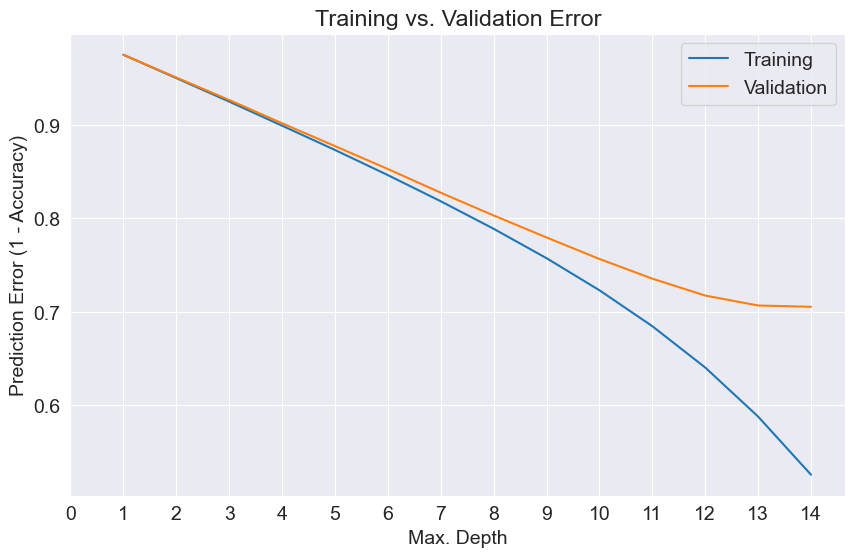

In [ ]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,15, 1))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])